In [57]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Further Regression Considerations

- Collinearity
- Cleaning and Preparing Data
- Test Train Split for Assessment


### Collinearity

The notion of independence of variables is related to the notion of collinearity.  Briefly, we find collinearity anytime we find strong relationships between dependent variables.  As we saw earlier, the relationship between `newspaper` and other mediums were interrelated to one another.  This can be detected by looking both at plots of the variables themselves against one another, examining the correlation coefficients of variables, and calculating the Variance in Frequency measure for the different features.

In [126]:
credit = pd.read_csv('data/credit.csv')
ads = pd.read_csv('data/ads.csv', index_col = 'Unnamed: 0')

<IPython.core.display.Javascript object>


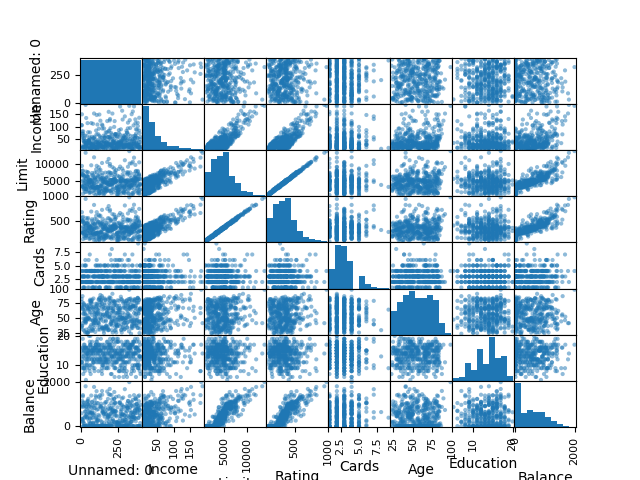

In [127]:
from pandas.plotting import scatter_matrix
scatter_matrix(credit);

Note the relationships between `Limit, Rating`, and `Balance`.  Both `Limit` and `Rating` seem to be related to `Balance`, however they are strongly related to one another.  This is not to be confused with the relationships between `TV` and `radio` that we saw earlier.  We can see this clearly by comparing the variables to one another side by side.

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>


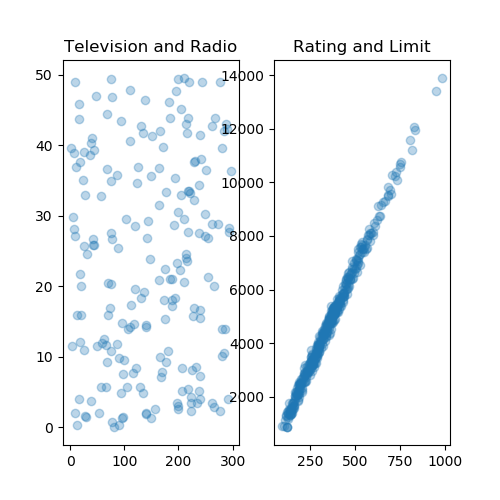

Text(0.5,1,'Rating and Limit')

In [129]:
plt.figure(figsize = (5, 5))
plt.subplot(1, 2, 1)
plt.scatter(ads['TV'], ads['radio'], alpha = 0.3);
plt.title("Television and Radio")

plt.subplot(1, 2, 2)
plt.scatter(credit['Rating'], credit['Limit'], alpha = 0.3);
plt.title("Rating and Limit")

### Collinearity Example

The `longley` dataset available through the `statsmodels` dataset package is another example of a highly collinear dataset.  Here, we are interested in determining the regression predicting the percent employed.

In [130]:
import statsmodels as sm

In [6]:
longley = sm.datasets.get_rdataset('longley')

In [131]:
longley.data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [132]:
print(longley.__doc__)

+---------+-----------------+
| longley | R Documentation |
+---------+-----------------+

Longley's Economic Regression Data
----------------------------------

Description
~~~~~~~~~~~

A macroeconomic data set which provides a well-known example for a
highly collinear regression.

Usage
~~~~~

::

    longley

Format
~~~~~~

A data frame with 7 economical variables, observed yearly from 1947 to
1962 (*n=16*).

``GNP.deflator``
    GNP implicit price deflator (*1954=100*)

``GNP``
    Gross National Product.

``Unemployed``
    number of unemployed.

``Armed.Forces``
    number of people in the armed forces.

``Population``
    ‘noninstitutionalized’ population *≥* 14 years of age.

``Year``
    the year (time).

``Employed``
    number of people employed.

The regression ``lm(Employed ~ .)`` is known to be highly collinear.

Source
~~~~~~

J. W. Longley (1967) An appraisal of least-squares programs from the
point of view of the user. *Journal of the American Statistical
Association* 

In [133]:
long_data = longley.data

In [134]:
long_data.columns

Index(['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Population',
       'Year', 'Employed'],
      dtype='object')

In [135]:
long_data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [136]:
corr_mat = long_data.corr()

<IPython.core.display.Javascript object>


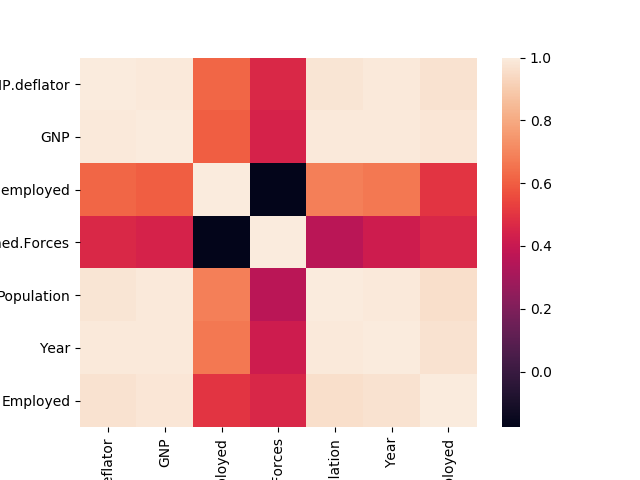

In [137]:
plt.figure()
sns.heatmap(corr_mat)

<IPython.core.display.Javascript object>


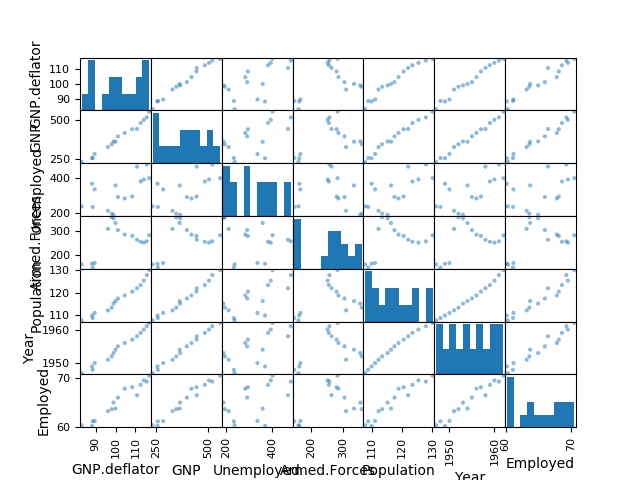

In [15]:
scatter_matrix(long_data);

### Problem

Return to your example dataset in the `Credit` example.  Remove any features you believe are highly correlated and refit your model.  Discuss performance.

### Feature Engineering and Cleaning


We want to return to our Housing example and consider how to use some of `scikitlearn`'s functionality to deal with missing values.  We want to determine the correct way of dealing with these one by one, and use some of what we know about the data to inform these decisions.  If we have objects that are missing values, we can either exclude the observations, or encode the missing values using some kind of numerical value.  


In [138]:
ames = pd.read_csv('data/ames_housing.csv')

In [139]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [140]:
ames.info()
ames.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [141]:
ames['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [142]:
ames.Alley.head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Alley, dtype: object

In [143]:
#Choose only the rows where the Alley data is not null
ames[ames['Alley'].notna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500


In [144]:
#I want to turn the Alley into a get dummies column and concat to original df
#X = pd.get_dummies(ames.Alley)
ames_alley_df = pd.DataFrame(pd.get_dummies(ames.Alley))
ames_alley_df.columns
ames_alley_df.head(5)

,Grvl,Pave
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [145]:
#only want to select the columns from the Ames dataset where the values are numeric so that I can use it for my Linear Regression
ames_numbers = ames.select_dtypes(include = 'int64')

In [146]:
ames_numbers.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [147]:
ames_numbers.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [148]:
#Look at the correlation of the ames_numbers dataset
corr_ames_numbers = ames_numbers.corr()

<IPython.core.display.Javascript object>


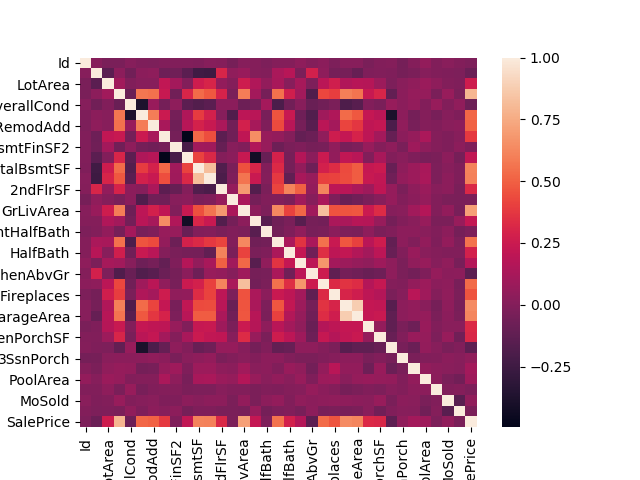

In [149]:
#Visualize the correlation
plt.figure()
sns.heatmap(corr_ames_numbers)

Appears to be a great deal of correlation between the Sales Price and the following variables:
    
    -GarageArea
    
    -GrLiveArea
    
    -OverallCond
    
    -RemodAdd
    
    -TotalBsmtSF

In [150]:
#Now that I only have the numeric values,I can start to look at linear regressions
#Need to drop the Sales Price because that is what I'm trying to predict!
X = ames_numbers.drop('SalePrice', axis = 1)
y = ames.SalePrice

In [151]:
X.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


# Finding the best variables to use as indicators

Using all numeric variables as indicators:

In [152]:
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
print('The root mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y, pred))))

The root mean squared error is 34709.80


Using the variable with the greatest correlation as the indicator

In [153]:
X2 = ames_numbers['GarageArea']
y2 = ames_numbers['SalePrice']
lr = LinearRegression()
lr.fit(X2.values.reshape(-1,1), y2)
pred2 = lr.predict(X2.values.reshape(-1,1))
print('The root mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y2, pred2))))

The root mean squared error is 62093.07


In [154]:
ames_numbers = pd.DataFrame(ames_numbers)
ames_numbers['OverallCond'] = ames_numbers['OverallCond'].fillna("None")
X3 = ames_numbers['OverallCond']
y3 = ames_numbers['SalePrice']
lr = LinearRegression()
lr.fit(X3.values.reshape(-1,1), y3)
pred3 = lr.predict(X3.values.reshape(-1,1))
print('The root mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y3, pred3))))

The root mean squared error is 79174.24


In [155]:
X4 = ames_numbers[['OverallCond', 'GarageArea', 'GrLivArea', 'Fireplaces']]
y4 = ames_numbers['SalePrice']
lr = LinearRegression()
lr.fit(X4, y4)
pred4 = lr.predict(X4)
coef4 = lr.coef_
inter4 = lr.intercept_
print('The root mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y4, pred4))))
print('The intercept is {:.2f}' .format(inter4))
print(coef4)

The root mean squared error is 48336.90
The intercept is -9464.11
[ 1318.88355535   135.83006403    70.76244138 18840.11166174]


In [162]:
ames['BsmtCond'].value_counts()

3.0    1311
4.0      65
2.0      45
1.0       2
Name: BsmtCond, dtype: int64

In [ ]:
ames = ames.replace({"BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}})

In [164]:
ames['BsmtQual'].value_counts()

3.0    649
4.0    618
5.0    121
2.0     35
Name: BsmtQual, dtype: int64

In [182]:
ames = ames.replace({"GarageCond": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [183]:
ames.GarageCond.value_counts()

3.0    1326
0.0      81
2.0      35
4.0       9
1.0       7
5.0       2
Name: GarageCond, dtype: int64

In [184]:
ames.GarageQual.head()

0    3
1    3
2    3
3    3
4    3
Name: GarageQual, dtype: object

In [186]:
ames = ames.replace({"GarageQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [187]:
ames.GarageQual.value_counts()

3.0    1311
0.0      81
2.0      48
4.0      14
1.0       3
5.0       3
Name: GarageQual, dtype: int64

**PROBLEMS**

Continue to code a few more columns and make sure to replace any `na` values in at least:

- `OverallQual`
- `OverallCond`
- `GarageQual`
- `GarageCond`
- `PoolArea`
- `PoolQC`

In [177]:
ames = pd.DataFrame(ames)
ames['OverallQual'] = ames['OverallQual'].fillna("None")
ames['OverallCond'] = ames['OverallCond'].fillna("None")
ames['GarageQual'] = ames['GarageQual'].fillna("None")
ames['GarageCond'] = ames['GarageCond'].fillna("None")
ames['PoolArea'] = ames['PoolArea'].fillna("None")
ames['PoolQC'] = ames['PoolQC'].fillna("None")
ames['BsmtQual'] = ames['BsmtQual'].fillna("None")

In [172]:
ames['BsmtQual'].head(5)

0    4.0
1    4.0
2    4.0
3    3.0
4    4.0
Name: BsmtQual, dtype: float64

In [173]:
ames = ames.replace({"BsmtQual" : {1: "isntgood"}})

In [174]:
ames['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [175]:
ames.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [178]:
ames = ames.replace({"PoolQC": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}})

In [179]:
ames.PoolQC.value_counts()

0    1453
4       3
5       2
2       2
Name: PoolQC, dtype: int64

### Adding New Features

We can create many new features to help improve our models performance.  For example, any of the measures that have multiple categories could be combined.  Take `Overall`, `Garage`, and `Pool` for example.  We can create combinations of the subcolumns as follows.

In [100]:
ames.isna

<bound method DataFrame.isna of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [180]:
ames.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [188]:
ames[['OverallCond', 'OverallQual', 'GarageCond', 'GarageQual','PoolArea','PoolQC']].describe()

,OverallCond,OverallQual,GarageCond,GarageQual,PoolArea,PoolQC
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,5.575342,6.099315,2.808904,2.810274,2.758904,0.017808
std,1.112799,1.382997,0.719685,0.722898,40.177307,0.268952
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,3.000000,3.000000,0.000000,0.000000
50%,5.000000,6.000000,3.000000,3.000000,0.000000,0.000000
75%,6.000000,7.000000,3.000000,3.000000,0.000000,0.000000
max,9.000000,10.000000,5.000000,5.000000,738.000000,5.000000


**PROBLEMS**


Continue to add additional features that combine other existing ones in a sensible way.  Here are a few additional ideas:

```python
ames['OverallGrade'] = ames['OverallQual'] * ames['OverallCond']
ames['GarageOverall'] = ames['GarageQual'] * ames['GarageCond']
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']
```

Be sure you've coded these as numeric vectors before creating columns based on arithmetic involving them.

In [189]:
ames['OverallGrade'] = ames['OverallQual'] * ames['OverallCond']
ames['GarageOverall'] = ames['GarageQual'] * ames['GarageCond']
ames['PoolOverall'] = ames['PoolArea'] * ames['PoolQC']

In [190]:
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallGrade,GarageOverall,PoolOverall
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,35,9.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,48,9.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,35,9.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,35,9.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,40,9.0,0


In [191]:
ames_numbers2 = ames.select_dtypes(include = 'int64')

In [192]:
ames_numbers2.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,OverallGrade,PoolOverall
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,3.409589,15.060959,2.758904,0.017808,43.489041,6.321918,2007.815753,180921.195890,33.864384,10.167808
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,29.317331,55.757415,40.177307,0.268952,496.123024,2.703626,1.328095,79442.502883,9.219624,153.928372
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.000000,0.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,30.000000,0.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,35.000000,0.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,40.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,508.000000,480.000000,738.000000,5.000000,15500.000000,12.000000,2010.000000,755000.000000,90.000000,2952.000000


<IPython.core.display.Javascript object>


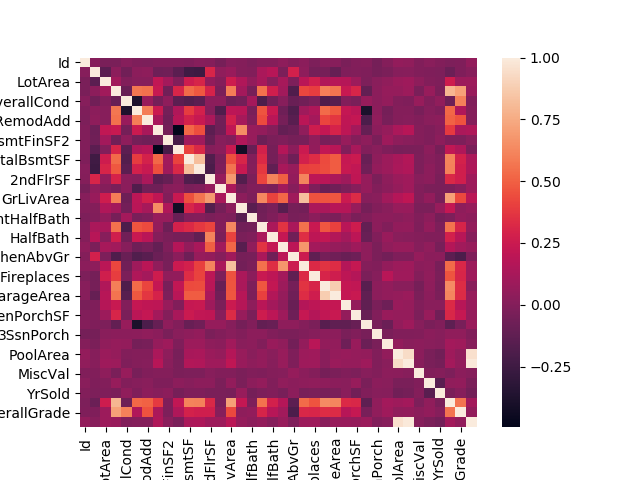

In [193]:
corr_ames_numbers = ames_numbers2.corr()
plt.figure()
sns.heatmap(corr_ames_numbers)

In [194]:
lm = LinearRegression()
X = ames['GrLivArea']
y = ames['SalePrice']
lm.fit(X.values.reshape(-1,1), y)

#lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Scikitlearn Linear Regression

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4)

In [197]:
lm = LinearRegression()

In [198]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [199]:
lm.coef_

array([ 1940.72644935,   129.66144376,    76.79903506, 18385.45611595])

In [200]:
lm.intercept_

-18883.78351324296

In [201]:
lm.score(X_train, y_train)

0.6487930078181959

In [202]:
lm.score(X_test, y_test)

0.557458354562142

In [203]:
from sklearn.metrics import mean_squared_error

In [204]:
predictions = lm.predict(X_test)

In [205]:
predictions[:8]

array([226980.47512666, 116025.05600657, 111332.67204882, 165113.77880273,
       161867.55949653, 233648.41482786, 113937.44018982, 145216.18381415])

In [206]:
y_test[:8]

238     318000
656     145500
985     125000
592     138000
102     118964
297     239000
972      99500
1364    144152
Name: SalePrice, dtype: int64

In [207]:
mse = mean_squared_error(y_test, predictions)

In [208]:
rmse = np.sqrt(mse)

In [209]:
print("MSE: ", mse, "\nRMSE: ", rmse)

MSE:  2523262780.8298697 
RMSE:  50232.08915454214


**PROBLEM**

Using the `sklearn` implementation of `LinearRegression()`, create a test and train set from your housing data.  To begin, fit a linear model on the **Logarithm** of the sales column with the `GrLivArea` feature.  Use this as your baseline to compare your transformations to.  

Include the transformations from above into a second linear model and try it out on the test set. Did the performance improve with your adjustments and transformations? 

Add polynomial features into the mix and see if you can get better improvement still.

In [210]:
X_GrLivArea = ames_numbers['GrLivArea']
y_GrLivArea = ames_numbers['SalePrice']
#using the logarithm of the SalePrice column as the baseline
y_log_GrLivArea = np.log(ames['SalePrice'])

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_GrLivArea, y_log_GrLivArea)

In [212]:
lm2= LinearRegression()

In [213]:
lm2.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
lm2.coef_

array([0.00052325])

In [215]:
lm2.intercept_

11.232451252419267

In [216]:
lm2.score(X_train.values.reshape(-1,1), y_train)

0.4849791212068154

In [217]:
predictions = lm2.predict(X_test.values.reshape(-1,1))

In [218]:
mse = mean_squared_error(y_test, predictions)

In [219]:
rmse = np.sqrt(mse)

In [220]:
print("MSE: ", mse, "\nRMSE: ", rmse)

MSE:  0.07460855961606881 
RMSE:  0.2731456747160182


1. Add in Polynomial Features using GrLivArea and OverallCond

2. Add in Grid Search

In [223]:
ames_numbers2.OverallCond.head()

0    5
1    8
2    5
3    5
4    5
Name: OverallCond, dtype: int64

In [224]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)

In [226]:
X = ames_numbers2[['OverallCond','GrLivArea']]
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([5.0000e+00, 1.7100e+03, 2.5000e+01, 8.5500e+03, 2.9241e+06])

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
lin_reg = LinearRegression()

In [230]:
lin_reg.fit(X_poly, ames.SalePrice)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
lin_reg.intercept_

-167875.1355803668

In [232]:
lin_reg.predict(X_poly)[:10]

array([208060.06398732, 144670.02880237, 216643.23336422, 208855.20773031,
       261262.94403445, 167356.38758782, 206239.09644615, 248513.63919462,
       215295.29236259, 136624.51042529])

In [233]:
lin_reg.score(X_poly, ames.SalePrice)

0.5196511160507798